# Fertilizer Recpmmendation System

## Importing Packages

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import pickle
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,accuracy_score
from imblearn.under_sampling import NearMiss
from sklearn.pipeline import make_pipeline

In [82]:
fert_df=pd.read_csv('C:Data/Fertilizer Prediction.csv')
fert_df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [83]:
fert_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


In [84]:
fert_df.nunique()

Temparature        14
Humidity           13
Moisture           41
Soil Type           5
Crop Type          11
Nitrogen           24
Potassium          13
Phosphorous        32
Fertilizer Name     7
dtype: int64

In [85]:
fert_df['Crop Type'].unique()

array(['Maize', 'Sugarcane', 'Cotton', 'Tobacco', 'Paddy', 'Barley',
       'Wheat', 'Millets', 'Oil seeds', 'Pulses', 'Ground Nuts'],
      dtype=object)

In [86]:
fert_df.isna().sum()

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

In [87]:
fert_df.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [88]:
fert_df.columns

Index(['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

In [89]:
fert_df['Fertilizer Name'].unique()

array(['Urea', 'DAP', '14-35-14', '28-28', '17-17-17', '20-20',
       '10-26-26'], dtype=object)

In [90]:
fert_df['Soil Type'].unique()

array(['Sandy', 'Loamy', 'Black', 'Red', 'Clayey'], dtype=object)

In [91]:
fert_df['Crop Type'].unique()

array(['Maize', 'Sugarcane', 'Cotton', 'Tobacco', 'Paddy', 'Barley',
       'Wheat', 'Millets', 'Oil seeds', 'Pulses', 'Ground Nuts'],
      dtype=object)

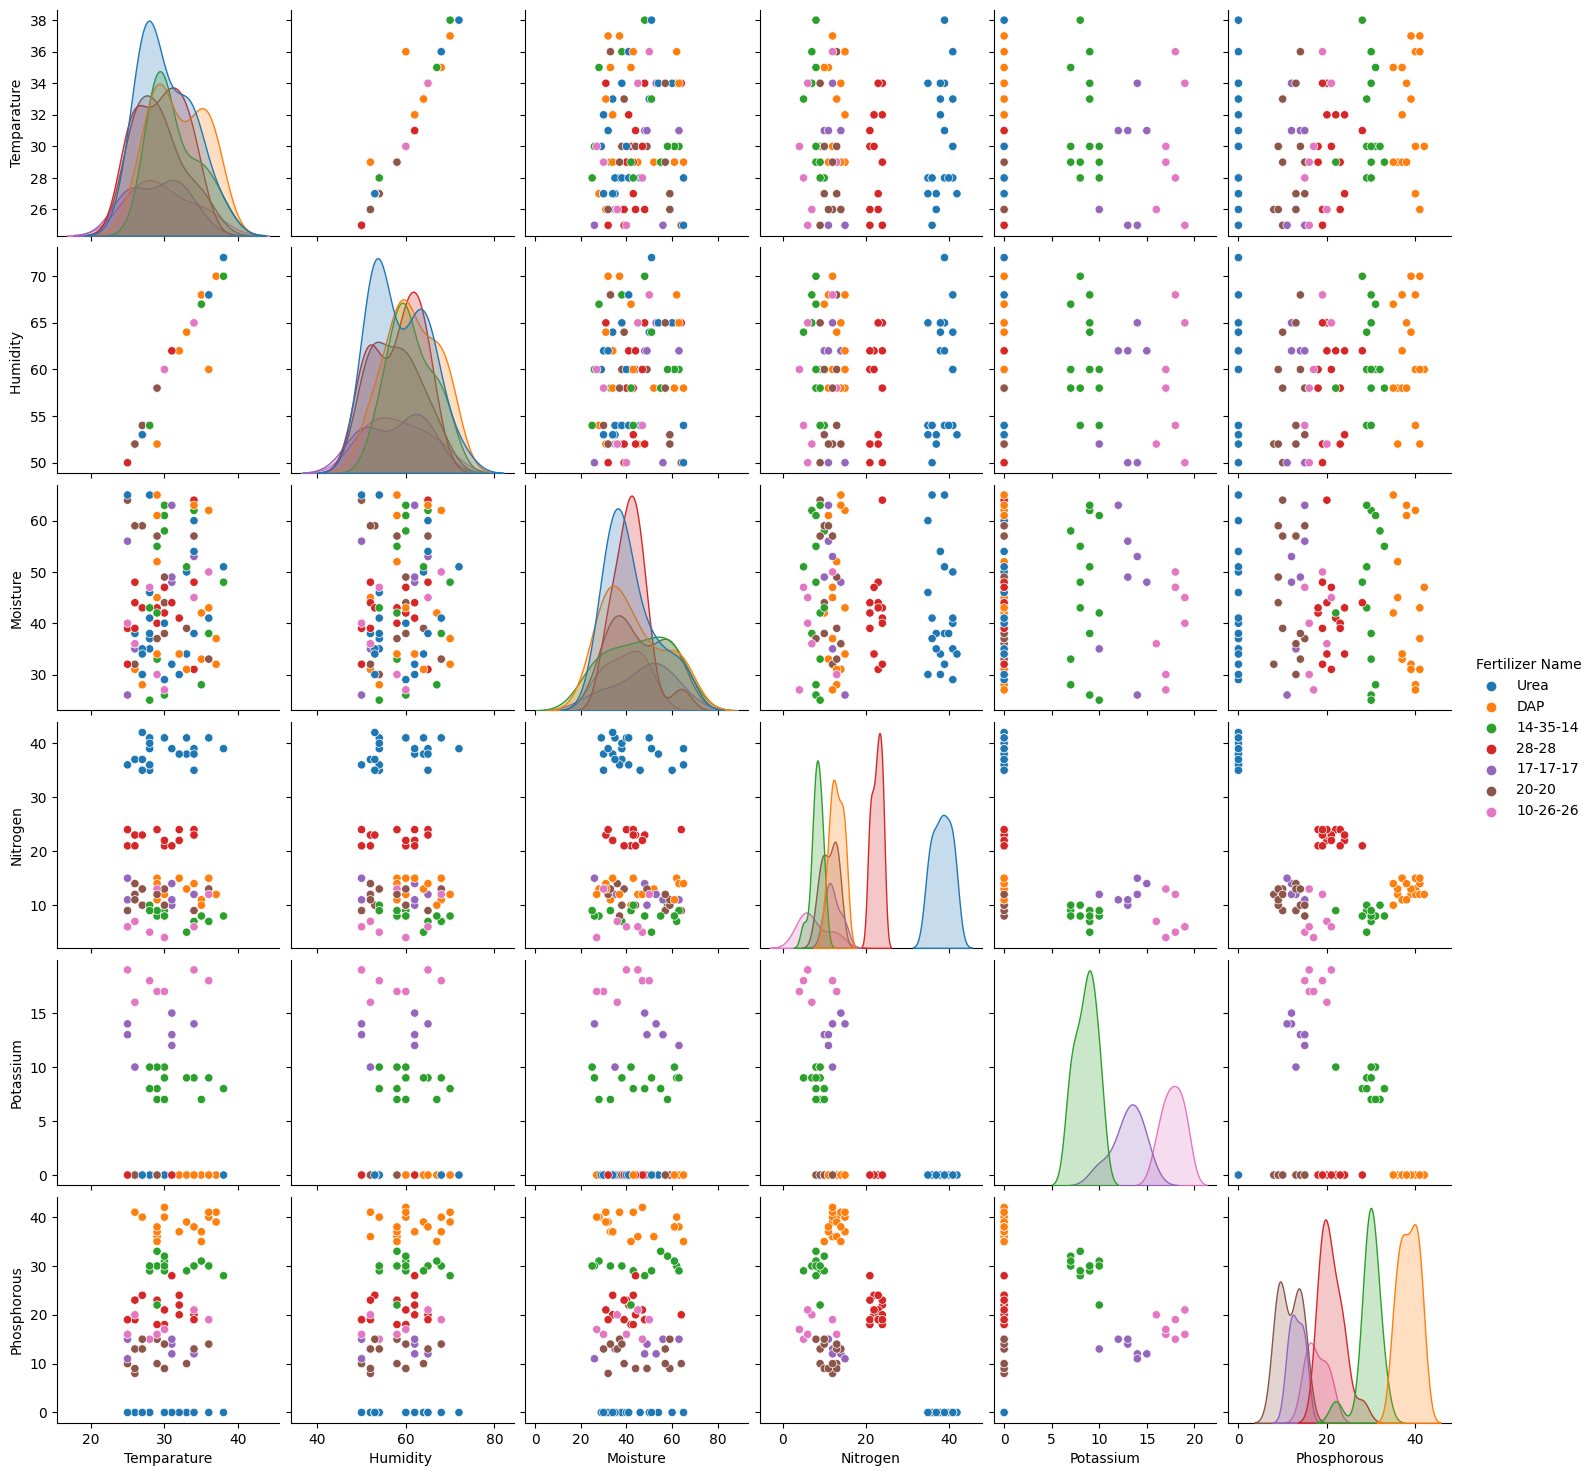

In [68]:
sns.pairplot(data=fert_df,hue='Fertilizer Name')

In [92]:
fert_df.corr()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
Temparature,1.000000,0.973164,0.091222,-0.033771,-0.023424,0.207545
Humidity,0.973164,1.000000,0.091342,-0.060646,-0.003833,0.204044
Moisture,0.091222,0.091342,1.000000,-0.095945,0.027727,0.009276
Nitrogen,-0.033771,-0.060646,-0.095945,1.000000,-0.500087,-0.686971
Potassium,-0.023424,-0.003833,0.027727,-0.500087,1.000000,0.089192
Phosphorous,0.207545,0.204044,0.009276,-0.686971,0.089192,1.000000


<Axes: >

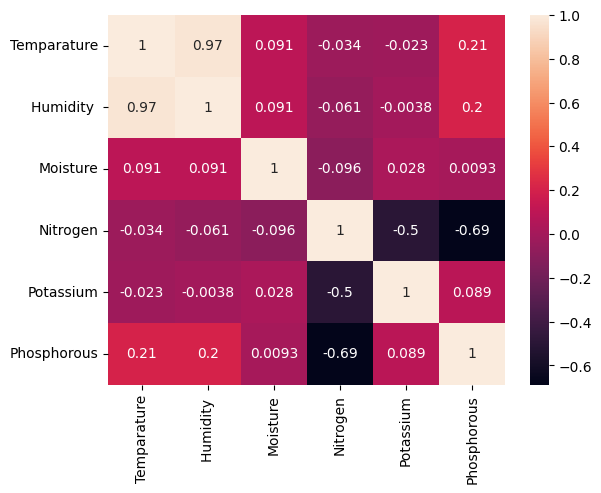

In [70]:
sns.heatmap(fert_df.corr(),annot=True)

In [93]:
fert_df=fert_df.drop(['Humidity '],axis=1)

In [94]:
fert_df.head()

,Temparature,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,38,Sandy,Maize,37,0,0,Urea
1,29,45,Loamy,Sugarcane,12,0,36,DAP
2,34,62,Black,Cotton,7,9,30,14-35-14
3,32,34,Red,Tobacco,22,0,20,28-28
4,28,46,Clayey,Paddy,35,0,0,Urea


In [95]:
fert_df['Fertilizer Name'].value_counts()

Urea        22
DAP         18
28-28       17
14-35-14    14
20-20       14
17-17-17     7
10-26-26     7
Name: Fertilizer Name, dtype: int64

In [96]:
fert_df.columns

Index(['Temparature', 'Moisture', 'Soil Type', 'Crop Type', 'Nitrogen',
       'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

In [97]:
crop_label=LabelEncoder()
soil_label=LabelEncoder()

In [98]:
fert_df['Crop Type']=crop_label.fit_transform(fert_df['Crop Type'])

In [99]:
fert_df['Soil Type']=soil_label.fit_transform(fert_df['Soil Type'])

In [100]:
fert_df.head()

,Temparature,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,38,4,3,37,0,0,Urea
1,29,45,2,8,12,0,36,DAP
2,34,62,0,1,7,9,30,14-35-14
3,32,34,3,9,22,0,20,28-28
4,28,46,1,6,35,0,0,Urea


In [101]:
fert_df['Crop Type'].unique()

array([ 3,  8,  1,  9,  6,  0, 10,  4,  5,  7,  2])

In [103]:
croptype_dict = {}
for i in range(len(fert_df["Crop Type"].unique())):
    croptype_dict[i] = crop_label.inverse_transform([i])[0]
print(croptype_dict)

soiltype_dict = {}
for i in range(len(fert_df["Soil Type"].unique())):
    soiltype_dict[i] = soil_label.inverse_transform([i])[0]
print(soiltype_dict)


{0: 'Barley', 1: 'Cotton', 2: 'Ground Nuts', 3: 'Maize', 4: 'Millets', 5: 'Oil seeds', 6: 'Paddy', 7: 'Pulses', 8: 'Sugarcane', 9: 'Tobacco', 10: 'Wheat'}
{0: 'Black', 1: 'Clayey', 2: 'Loamy', 3: 'Red', 4: 'Sandy'}


In [104]:
fert_df['Fertilizer Name'].value_counts()

Urea        22
DAP         18
28-28       17
14-35-14    14
20-20       14
17-17-17     7
10-26-26     7
Name: Fertilizer Name, dtype: int64

In [105]:
X=fert_df[['Temparature','Moisture','Soil Type','Crop Type','Nitrogen','Potassium','Phosphorous']]
Y=fert_df['Fertilizer Name']

In [106]:
X.shape,Y.shape

((99, 7), (99,))

In [107]:
nm=NearMiss()

In [108]:
X,Y=nm.fit_resample(X,Y)

In [109]:
X.shape,Y.shape

((49, 7), (49,))

In [110]:
X

,Temparature,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous
0,28,47,4,0,5,18,15
1,25,40,1,7,6,19,16
2,26,36,1,7,7,16,20
3,29,30,3,9,13,17,16
4,36,50,2,10,12,18,19
5,34,45,1,6,6,19,21
6,30,27,3,9,4,17,17
7,29,42,1,6,9,10,22
8,30,63,3,1,9,9,29
9,38,48,2,10,8,8,28


In [111]:
Y

0     10-26-26
1     10-26-26
2     10-26-26
3     10-26-26
4     10-26-26
5     10-26-26
6     10-26-26
7     14-35-14
8     14-35-14
9     14-35-14
10    14-35-14
11    14-35-14
12    14-35-14
13    14-35-14
14    17-17-17
15    17-17-17
16    17-17-17
17    17-17-17
18    17-17-17
19    17-17-17
20    17-17-17
21       20-20
22       20-20
23       20-20
24       20-20
25       20-20
26       20-20
27       20-20
28       28-28
29       28-28
30       28-28
31       28-28
32       28-28
33       28-28
34       28-28
35         DAP
36         DAP
37         DAP
38         DAP
39         DAP
40         DAP
41         DAP
42        Urea
43        Urea
44        Urea
45        Urea
46        Urea
47        Urea
48        Urea
Name: Fertilizer Name, dtype: object

In [112]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=7)

In [114]:
print(f"Train Data: {X_train.shape}, {Y_train.shape}")
print(f"Train Data: {X_test.shape}, {Y_test.shape}")

Train Data: (36, 7), (36,)
Train Data: (13, 7), (13,)


In [158]:
KNN = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=3))
svm=make_pipeline(StandardScaler(),SVC(kernel='linear',degree=2,C=1))
Decision_Tree=make_pipeline(StandardScaler(),DecisionTreeClassifier(criterion='entropy',random_state=2))
RF = make_pipeline(StandardScaler(),RandomForestClassifier(n_estimators=30))
Gaussian=make_pipeline(StandardScaler(),GaussianNB())

In [133]:
model_names=[]
models=[]
acc=[]

In [134]:
Decision_Tree.fit(X_train,Y_train)
predicted_values = Decision_Tree.predict(X_test)
print(accuracy_score(Y_test,predicted_values))

1.0


In [135]:
score=cross_val_score(Decision_Tree,X,Y,cv=5)
print(score)
ans=sum(score)/len(score)
print(ans)

[0.9        1.         1.         1.         0.88888889]
0.9577777777777777


In [136]:
model_names.append('Decesion_Tree')
models.append(Decision_Tree)
acc.append(ans)

In [137]:
Gaussian.fit(X_train,Y_train)
predicted_values=Gaussian.predict(X_test)
print(accuracy_score(Y_test,predicted_values))

1.0


In [138]:
score=cross_val_score(Gaussian,X,Y,cv=5)
print(score)
ans=sum(score)/len(score)
print(ans)

[0.8        1.         1.         1.         0.88888889]
0.9377777777777776


In [139]:
model_names.append('Gaussian_Naive_bayes')
models.append(Gaussian)
acc.append(ans)

In [140]:
svm.fit(X_train,Y_train)
predicted_values=svm.predict(X_test)
print(accuracy_score(Y_test,predicted_values))

1.0


In [148]:
score=cross_val_score(svm,X,Y,cv=6)
print(score)
ans=sum(score)/len(score)
print(ans)

[0.77777778 1.         1.         1.         1.         1.        ]
0.9629629629629629


In [149]:
model_names.append('SVM')
models.append(svm)
acc.append(ans)

In [154]:
RF.fit(X_train,Y_train)
predicted_values=RF.predict(X_test)
print(accuracy_score(Y_test,predicted_values))

1.0


In [155]:
score=cross_val_score(RF,X,Y,cv=5)
print(score)
ans=sum(score)/len(score)
print(ans)

[0.8 1.  0.9 1.  1. ]
0.9400000000000001


In [156]:
model_names.append('Random_Forest')
models.append(RF)
acc.append(ans)

In [159]:
KNN.fit(X_train,Y_train)
predicted_values=KNN.predict(X_test)
print(accuracy_score(Y_test,predicted_values))

0.5384615384615384


In [161]:
score=cross_val_score(KNN,X,Y,cv=5)
print(score)
ans=sum(score)/len(score)
print(ans)


[0.4        0.6        0.4        0.6        0.33333333]
0.4666666666666667


In [162]:
model_names.append('KNN')
models.append(KNN)
acc.append(ans)

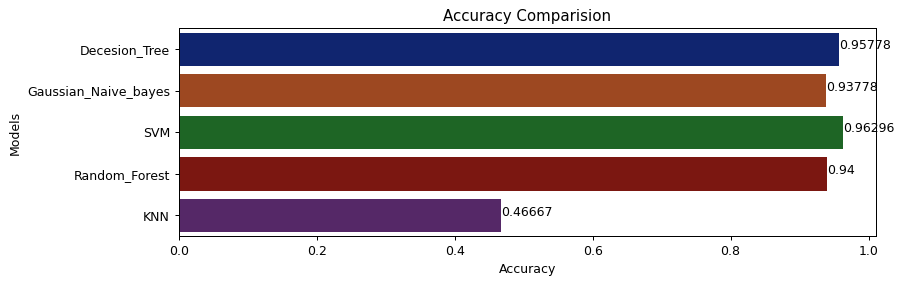

In [163]:
plt.figure(figsize=[10,3],dpi=90)
plt.title('Accuracy Comparision')
plt.xlabel('Accuracy')
plt.ylabel('Models')
sns.barplot(x=acc,y=model_names,palette='dark')
for i,j in enumerate(acc):
    x=round(j,5)
    plt.text(j,i,str(x))

In [164]:
for i in range(len(model_names)):
    pickle.dump(models[i],open(model_names[i]+'.pkl','wb'))

In [173]:
data=np.array(fert_df.sample())
print(data)
data=np.array([data[0][:7]])
data

[[29 65 0 1 14 0 35 'DAP']]


array([[29, 65, 0, 1, 14, 0, 35]], dtype=object)

In [174]:
for i in range(20):
    data=np.array(fert_df.sample())
    print(data)
    data=np.array([data[0][:7]])
    for i in range(len(models)):
        print(model_names[i].ljust(23,'-')+'>',models[i].predict(data))
    print('-------------------------------------------')

[[30 47 4 3 22 0 21 '28-28']]
Decesion_Tree----------> ['28-28']
Gaussian_Naive_bayes---> ['28-28']
SVM--------------------> ['28-28']
Random_Forest----------> ['28-28']
KNN--------------------> ['28-28']
-------------------------------------------
[[26 44 4 3 23 0 20 '28-28']]
Decesion_Tree----------> ['28-28']
Gaussian_Naive_bayes---> ['28-28']
SVM--------------------> ['28-28']
Random_Forest----------> ['28-28']
KNN--------------------> ['28-28']
-------------------------------------------
[[34 63 3 1 14 0 38 'DAP']]
Decesion_Tree----------> ['DAP']
Gaussian_Naive_bayes---> ['DAP']
SVM--------------------> ['DAP']
Random_Forest----------> ['DAP']
KNN--------------------> ['DAP']
-------------------------------------------
[[37 37 1 6 12 0 41 'DAP']]
Decesion_Tree----------> ['DAP']
Gaussian_Naive_bayes---> ['DAP']
SVM--------------------> ['DAP']
Random_Forest----------> ['DAP']
KNN--------------------> ['14-35-14']
-------------------------------------------
[[30 61 2 1 8 10 31 '14